# Triatlon Poděbrady 

In [10]:
import pandas as pd
import os
import csv
import datetime
import numpy as np
import dateutil
import seaborn as sns
from bs4 import BeautifulSoup
import requests
from datetime import datetime, timedelta

import matplotlib.dates as dates
import matplotlib.pyplot as plt
from IPython.display import display


%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 8

In [2]:
URL_MUZI = 'https://vysledky.irontime.cz/vysledky1304/?zavod=1304&trat=2133'
URL_ZENY = 'https://vysledky.irontime.cz/vysledky1304/?zavod=1304&trat=2134'

In [3]:
def parse_timedelta(s, seconds=False):
    try:
        s = s.replace('+', '')
        t = datetime.strptime(s,"%H:%M:%S.%f")
        d = timedelta(hours=t.hour, minutes=t.minute, seconds=t.second)
        if seconds:
            return d.total_seconds()
        return d
    except:
        d = timedelta(hours=0, minutes=0, seconds=0)        
        if seconds:
            return d.total_seconds()
        return d
  
#print(parse_timedelta("01:19:13.67"))
#print(parse_timedelta("01:19:13.67", seconds=True))
#print(parse_timedelta(None))
#print(parse_timedelta(None, seconds=True))

In [4]:
t_cols = ['Oficiální čas', 'Ztráta', 'plavání', 'D1', 'kolo', 'D2', 'běh']

In [5]:
df_m = pd.read_csv('muzi.csv', index_col=False)
for c in t_cols:
    df_m['{}_s'.format(c)] = df_m[c].apply(parse_timedelta, seconds=True)
    df_m[c] = df_m[c].apply(parse_timedelta)

In [6]:
df_z = pd.read_csv('zeny.csv', index_col=False)
for c in t_cols:   
    df_z['{}_s'.format(c)] = df_z[c].apply(parse_timedelta, seconds=True)
    df_z[c] = df_z[c].apply(parse_timedelta)    

In [7]:
polcar = df_m[df_m['Příjmení']=='POLCAR']
gavlas = df_m[df_m['Příjmení']=='GAVLAS']

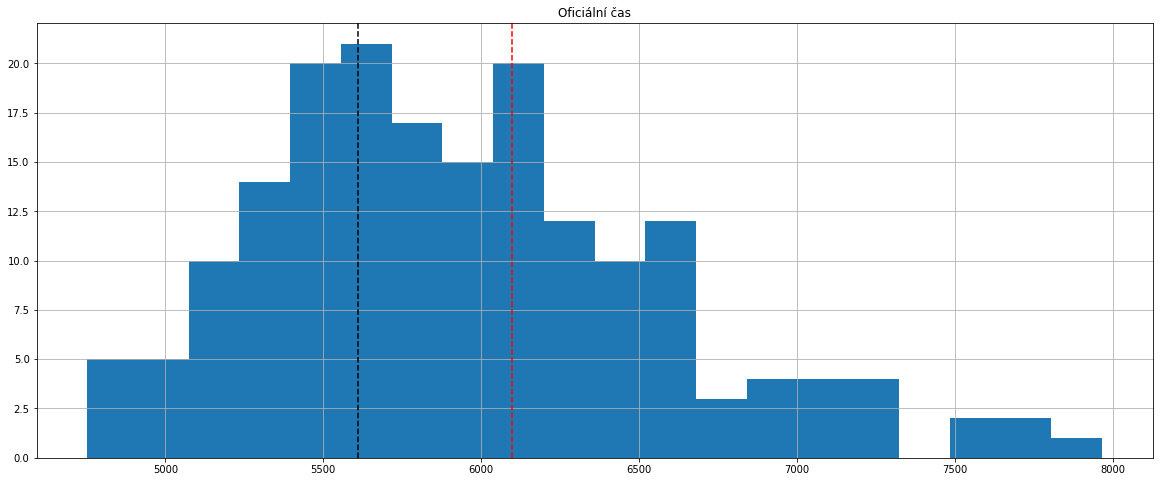

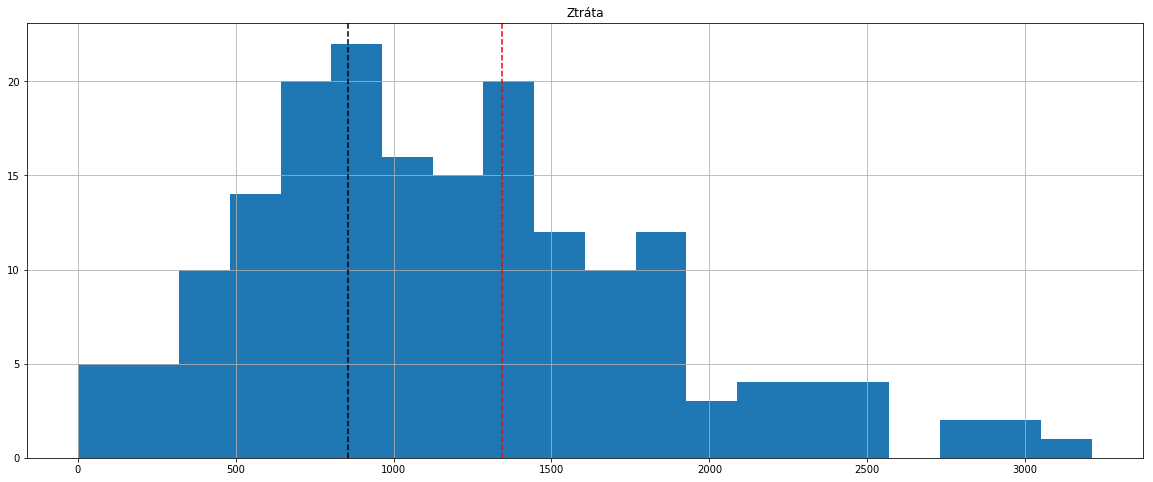

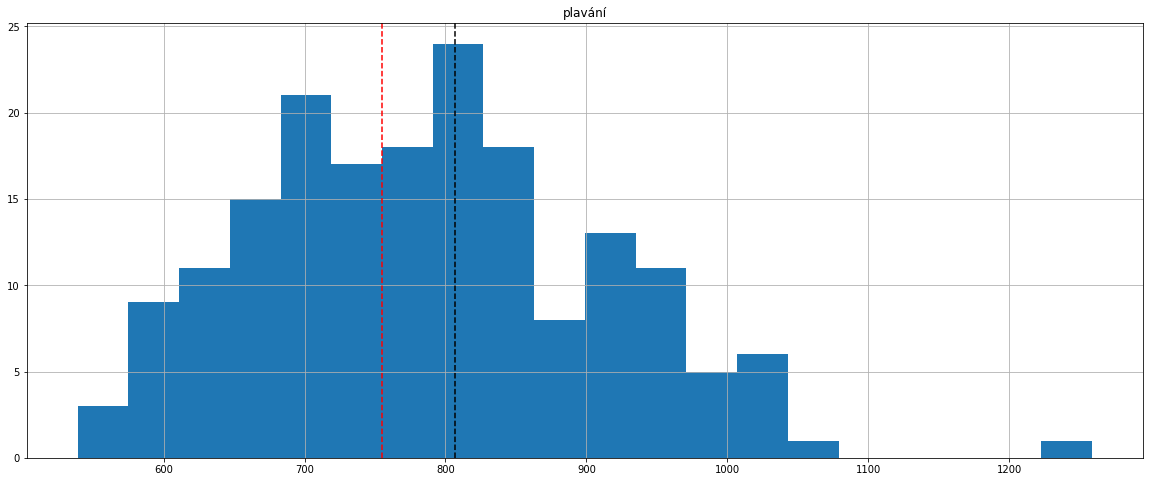

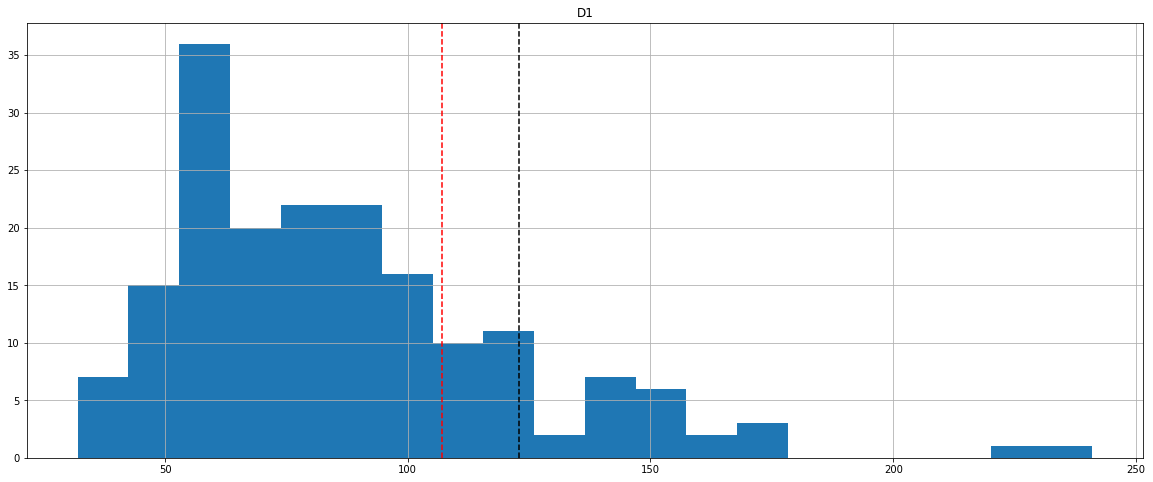

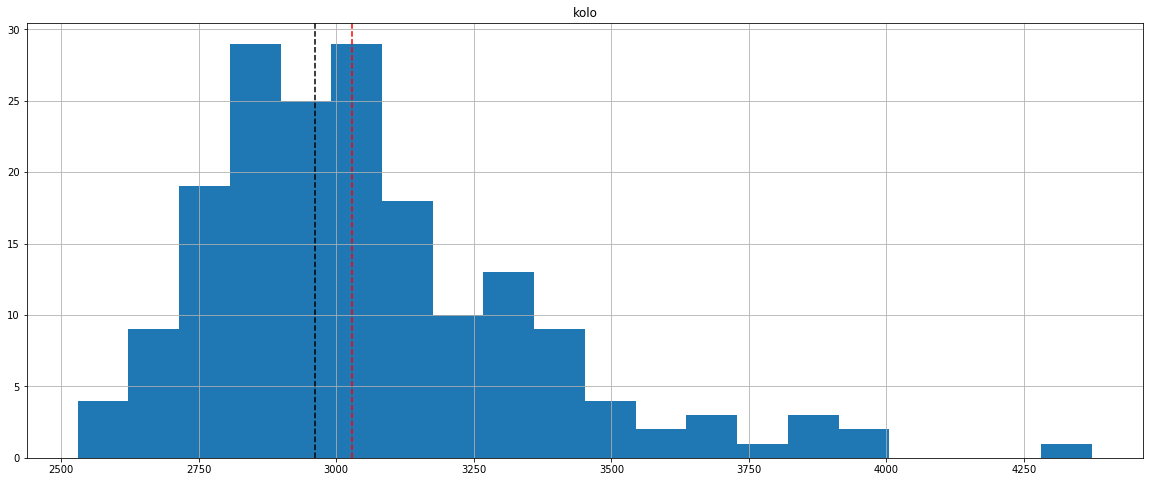

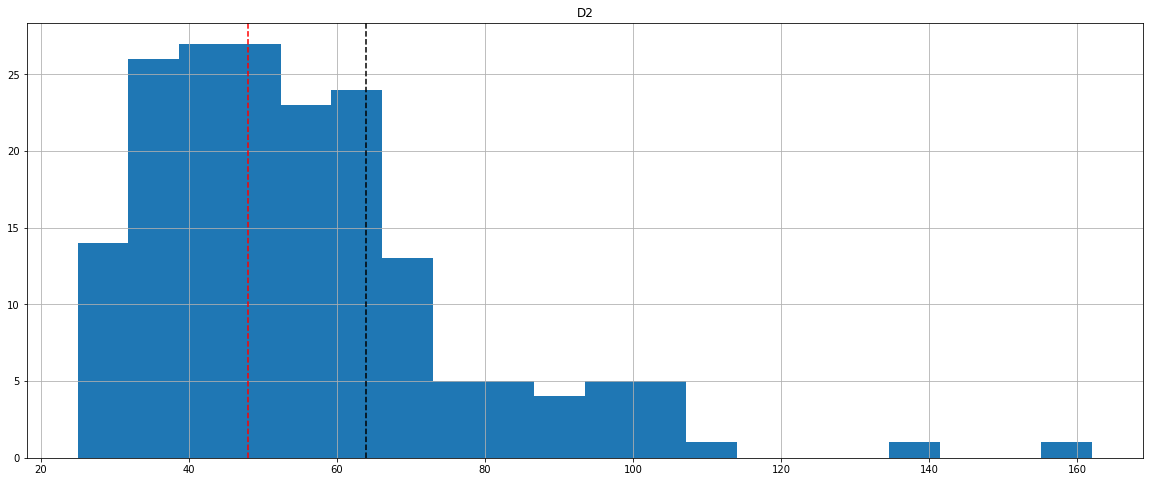

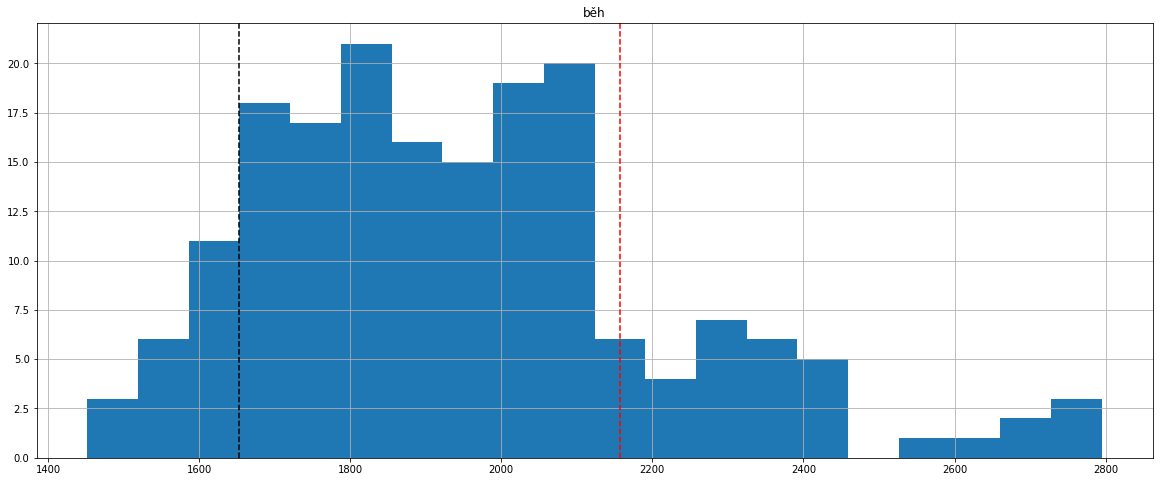

In [11]:
for t_col in t_cols:
    col = t_col+'_s'
    fig, ax = plt.subplots()
    plt.title(t_col)
    df_m[col].hist(ax=ax, bins=20, label=t_col)
    ax.axvline(polcar[col].values[0], color='k', linestyle='--')
    ax.axvline(gavlas[col].values[0], color='r', linestyle='--')